In [2]:
import json
import pandas as pd

In [10]:
#Import the data: Teams
team=pd.read_json(r"C:\Users\simon\Desktop\ADM Homework 2\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)
#From index 98, the type is given as Nation. So we don't need that.
team=team[:98]
#convert the area from a series to a list
#Convert the list into a dataframe and concate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)



# RQ 2

In [14]:
PLteams = pd.DataFrame(team[team.id == '0'])
teams = pd.DataFrame({'Name' : list(PLteams.officialName), 'ID' : list(PLteams['wyId'])})
teams
team_data = Matches.teamsData

In [12]:
# I've chosen to take the two top ranking teams, Manchester City and Manchester Utd., two mid-ranking, Newcastle Utd. and
# Leicester City and the bottom ranking team of the season, West Bromwich.
team5 = ['1625', '1611', '1613', '1631', '1627']
print(*[teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5], sep = '\n')

Manchester City FC
Manchester United FC
Newcastle United FC
Leicester City FC
West Bromwich Albion FC


In [13]:
Matches = pd.read_json(r"C:\Users\simon\Desktop\ADM Homework 2\matches\matches_England.json")

In [16]:
# Defining a function to output the contingeny tables in line with html format
from IPython.display import display_html
def mydisplay(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center"><strong><em>{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:center"> {df.to_html(index=True)}</td>' 
                         for df in dfs) +
                 '</tr>') 
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)
    

frames = []
for t in team5:   
    a = []
    
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) :
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])

Manchester City FC Manchester United FC Newcastle United FC Leicester City FC West Bromwich Albion FC 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 1 
 16 
 
 
 home 
 2 
 1 
 16 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 5 
 10 
 
 
 home 
 2 
 2 
 15 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 11 
 4 
 
 
 home 
 4 
 7 
 8 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 5 
 9 
 5 
 
 
 home 
 6 
 6 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 12 
 3 
 
 
 home 
 9 
 7 
 3

In [17]:
frames = []
Total = []
for t in team5:   
    a = []
    othteam = set(team5)
    othteam.remove(t)
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) and len(othteam.intersection(set(Matches['teamsData'][i].keys()))) == 0:
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                Total.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                Total.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                Total.append([team_data[i][t]['side'], 'lose'])
    
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])


Manchester City FC Manchester United FC Newcastle United FC Leicester City FC West Bromwich Albion FC 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 1 
 12 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 4 
 8 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 9 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 5 
 7 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 11 
 1 
 
 
 home 
 8 
 4 
 3

In [18]:
Tot = pd.DataFrame(Total, columns=['side', 'result'])
cont_tab = pd.crosstab(Tot.side, Tot.result, margins= True)
cont_tab

result,draw,lose,win,All
side,,,,
away,16,32,27,75
home,20,12,43,75
All,36,44,70,150


#### H0 : The null Hypothesis is that there's no statistically significant relationship between the side on which a team plays and the result of the match

#### H1: The alternative hypotesis is that there's significant relationship between the side of a team and its result in a match

### Chi-Squared Test

In [19]:
import numpy as np
f_obs = np.append(cont_tab.iloc[0][0:3].values, cont_tab.iloc[1][0:3].values)
f_obs

array([16, 32, 27, 20, 12, 43], dtype=int64)

In [20]:
row_sums = cont_tab.iloc[0:2,3].values
row_sums

array([75, 75], dtype=int64)

In [21]:
col_sums = cont_tab.iloc[2,0:3].values
col_sums

array([36, 44, 70], dtype=int64)

In [22]:
total = cont_tab.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[18.0, 22.0, 35.0, 18.0, 22.0, 35.0]

In [23]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 13.192496392496395


In [24]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 2


In [25]:
import scipy.stats as ss
ss.chi2.ppf(0.99, 2) < chi_squared_statistic

True

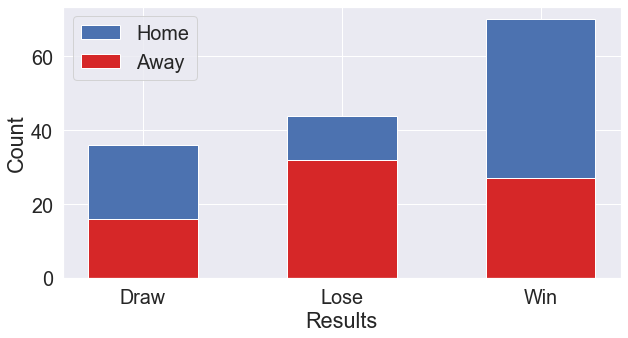

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#Assigns the frequency values
awaycount = cont_tab.iloc[0][0:3].values
homecount = cont_tab.iloc[1][0:3].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
results = ["Draw","Lose","Win"]
p1 = plt.bar(results, awaycount, 0.55, color='#d62728')
p2 = plt.bar(results, homecount, 0.55, bottom=awaycount)
plt.legend((p2[0], p1[0]), ('Home','Away'))
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()

#### Since the Chi-squared statistic obtained from our calculation is bigger than the 99th percentile of the Chi-squared (with 2 degrees of freedom), we can conlude that the null hypotesis must be rejected. There is a relationship between the side on which a team plays and its result in a match, and we can infer, by looking at the barplot, that playing home influences positively a team's chances of winning a match (likewise, playing away increases chances of losing).

# RQ 3

### Since we want to find the 10 teams who had the youngest coaches during the whole season, we need to check all of the mathces to see if any team had more than one coach during the season. If that is the case, we will keep only the youngest

#### This information can be found in the teamsData column of Matches dataframe, with the coachId entry

In [28]:
teams = teams.set_index('ID')

In [29]:
d = dict()
for t in teams.index:
        d[str(t)] = set()
for i in range(len(Matches)):
    data = pd.DataFrame({'Coach': pd.DataFrame(team_data[i].values())['coachId'], 
                         'Team' : pd.DataFrame(team_data[i].values())['teamId']})
    for t in data.Team:
    #in some matches the coachId is '0', meaning that there's no information, and these values should be removed
        if int(data.Coach[data.Team == t]) != 0:
            d[str(t)].add(int(data.Coach[data.Team == t]))  

#### Just a basic visualization of coach changes for all teams

In [31]:
# Making all rows of the same length to avoid the creation of NaN values in the dataframe for a better visualization
dnew = d.copy()
for i in dnew.keys():
    dnew[i] = list(dnew[i])
    if len(dnew[i]) < 3:
        for _ in range(3-len(dnew[i])):
            dnew[i].append('-')
a = teams.join(pd.DataFrame(dnew.values(), index=map(int, d.keys())))
a

,Name,0,1,2
ID,,,,
1613,Newcastle United FC,531745,210700,-
1673,Huddersfield Town FC,18572,-,-
10531,Swansea City AFC,381291,32573,-
1659,AFC Bournemouth,8934,-,-
1651,Brighton & Hove Albion FC,8093,-,-
1646,Burnley FC,8880,-,-
1631,Leicester City FC,209010,333782,8214
1633,West Ham United FC,8235,269869,-
1639,Stoke City FC,8329,9054,-


### Now the coaches database must be imported, to match the IDs of Premier league coaches in the dictionary with their corresponding birth dates contained in the database

In [32]:
coaches = pd.read_json(r'C:\Users\simon\Desktop\ADM Homework 2\coaches.json').drop(['firstName', 'lastName', 'middleName', 'passportArea', 'birthArea'], axis = 1)

#### There's a problem with one of the coaches wyId. It came out that 3782 is not a valid coach ID. In fact, by checking the team to which this ID is associated, Tottenham FC, we can be sure that there should be only one coach wyID (292863), the one associated with Mauricio Pochettino, the only manager of Tottenham since 2014.

In [33]:
coaches[coaches.wyId == 3782]

,birthDate,currentTeamId,shortName,wyId


In [34]:
coaches[coaches.wyId == 292863]

,birthDate,currentTeamId,shortName,wyId
90,1972-03-02,1624,M. Pochettino,292863


#### Changing the dictionary entry of Tottenham FC

In [35]:
d['1624'] = {292863}

In [36]:
for i in d.keys():
    bd = []
    for v in d[i]:
        bd.append(coaches.birthDate[coaches.wyId == v].iloc[0])
    bd.sort()
    print(bd)


['1960-04-16', '1973-02-19']
['1971-10-19']
['1965-12-04', '1972-01-08']
['1977-11-29']
['1958-12-11']
['1971-06-28']
['1961-09-02', '1963-10-26', '1975-12-04']
['1963-04-25', '1968-09-11']
['1963-11-01', '1969-08-07']
['1970-05-01', '1977-07-12']
['1954-10-19', '1963-03-21', '1973-10-16']
['1958-01-16', '1959-05-02', '1961-07-18']
['1971-01-18']
['1972-03-02']
['1947-08-09', '1970-05-15']
['1963-11-01', '1971-10-05']
['1967-06-16']
['1969-07-31', '1969-07-31']
['1963-01-26']
['1949-10-22']


#### It also came out that Chelsea FC has two coach wyIDs associated to the same manager, Antonio Conte, hence the list with the same date repeated twice. This wouldn't affect our analysis since the two entries in the coaches database are identical, but one of the two wyIDs will be removed to avoid redundancy.

In [37]:
coaches[coaches.wyId == 272869]

,birthDate,currentTeamId,shortName,wyId
198,1969-07-31,0,A. Conte,272869


In [38]:
coaches[coaches.wyId == 20454]

,birthDate,currentTeamId,shortName,wyId
8,1969-07-31,0,A. Conte,20454


In [39]:
d['1610'].remove(20454)

#### We can now assign the highest value of the sorted bd (birth date) list to each team's entry in the dictionary, so that we only keep the youngest coach for every team.

In [40]:
dnew = dict()
for i in d.keys():
    bd = []
    for v in d[i]:
        bd.append(coaches.birthDate[coaches.wyId == v].iloc[0])
    bd.sort()
    dnew[i] = bd[-1]
dnew  

{'1613': '1973-02-19',
 '1673': '1971-10-19',
 '10531': '1972-01-08',
 '1659': '1977-11-29',
 '1651': '1958-12-11',
 '1646': '1971-06-28',
 '1631': '1975-12-04',
 '1633': '1968-09-11',
 '1639': '1969-08-07',
 '1644': '1977-07-12',
 '1623': '1973-10-16',
 '1627': '1961-07-18',
 '1625': '1971-01-18',
 '1624': '1972-03-02',
 '1628': '1970-05-15',
 '1619': '1971-10-05',
 '1612': '1967-06-16',
 '1610': '1969-07-31',
 '1611': '1963-01-26',
 '1609': '1949-10-22'}

In [41]:
ordered_DF = pd.DataFrame({'teamID' : list(dnew.keys()), 'Team_Name' : list(teams['Name']),
              'Coach_Birthday' : list(dnew.values())}).sort_values(by = 'Coach_Birthday', ascending=False)

In [42]:
ordered_DF.reset_index(drop = True, inplace=True)

### The top 10 teams with the youngest coaches feature in the following table

In [43]:
ordered_DF[0:10]

,teamID,Team_Name,Coach_Birthday
0,1659,AFC Bournemouth,1977-11-29
1,1644,Watford FC,1977-07-12
2,1631,Leicester City FC,1975-12-04
3,1623,Everton FC,1973-10-16
4,1613,Newcastle United FC,1973-02-19
5,1624,Tottenham Hotspur FC,1972-03-02
6,10531,Swansea City AFC,1972-01-08
7,1673,Huddersfield Town FC,1971-10-19
8,1619,Southampton FC,1971-10-05
9,1646,Burnley FC,1971-06-28


In [44]:
allcoachesPL = []
for v in d.values():
    allcoachesPL += list(v)
    

In [46]:
alldates = []
for c in allcoachesPL:
    alldates.append(coaches.birthDate[coaches.wyId == c].iloc[0])    

#### To get the ages of the PL coaches, 2017-12-31 is taken as reference, because it falls in the middle of the 2017/2018 season and makes calculation easier.

In [129]:
ages = [2017 - int(i[0:4]) for i in alldates]

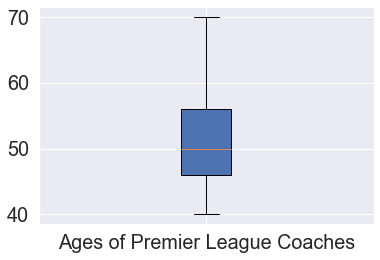

In [138]:
plt.boxplot(ages, labels = ['Ages of Premier League Coaches'], patch_artist=True)
plt.show()